In [7]:


import opendatasets as od

od.download("https://www.kaggle.com/mlg-ulb/creditcardfraud")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: divijaiwanth
Your Kaggle Key: ········


100%|█████████████████████████████████████████████████████████████████████████████| 66.0M/66.0M [00:38<00:00, 1.81MB/s]


In [16]:
from __future__ import print_function
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
from sklearn.model_selection import train_test_split 
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
import time
import  warnings
warnings.filterwarnings('ignore')

In [21]:
raw_data = pd.read_csv('creditcardfraud/creditcard.csv')
print("There are " , (len(raw_data) , "observations in the dataset."))
print("There are " , (len(raw_data.columns) , "variables in the dataset"))

raw_data.head()

There are  (284807, 'observations in the dataset.')
There are  (31, 'variables in the dataset')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [25]:
n_replicas = 10

big_raw_data = pd.DataFrame(np.repeat(raw_data.values,n_replicas , axis = 0),columns = raw_data.columns)

print("There are " , (len(big_raw_data) , "observations in the dataset."))
print("There are " , (len(big_raw_data.columns) , "variables in the dataset"))

big_raw_data.head()



There are  (2848070, 'observations in the dataset.')
There are  (31, 'variables in the dataset')


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
2,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
3,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
4,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


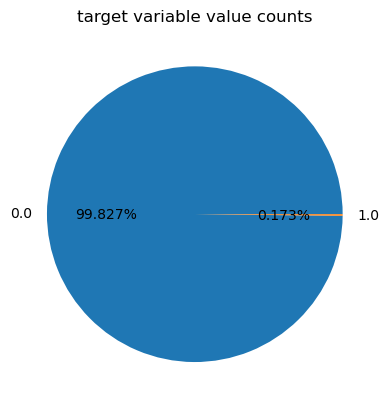

In [35]:
labels = big_raw_data.Class.unique()

sizes = big_raw_data.Class.value_counts().values

fig , ax = plt.subplots()
ax.pie(sizes,labels=labels,autopct='%1.3f%%')
ax.set_title("target variable value counts")
plt.show()

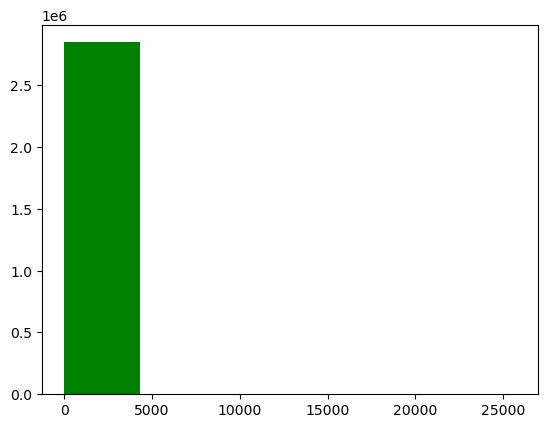

Minimun Amount value is  0.0
Maximum Amount value is  25691.16
90% of the transactions have a mounte less or equal than  203.0


In [47]:
plt.hist(big_raw_data.Amount.values,6,histtype = 'bar' , facecolor = 'g')
plt.show()

print("Minimun Amount value is " , np.min(big_raw_data.Amount.values))
print("Maximum Amount value is " , np.max(big_raw_data.Amount.values))
print("90% of the transactions have a mounte less or equal than " , np.percentile(raw_data.Amount.values,90))


In [55]:
big_raw_data.iloc[: , 1:30] = StandardScaler().fit_transform(big_raw_data.iloc[: ,1:30])
data_matrix = big_raw_data.values

x = data_matrix[:, 1:30]

y = data_matrix[: , 30]

x = normalize(x , norm="l1")

print("x_shape" , x.shape , "Y_shape" , y.shape)

x_shape (2848070, 29) Y_shape (2848070,)


In [57]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.3,random_state=42,stratify=y)
print("x_train shape:" , x_train.shape , "x_test shape",x_test.shape)
print("y_train shape:" , y_train.shape , "y_test shape",y_test.shape)


x_train shape: (1993649, 29) x_test shape (854421, 29)
y_train shape: (1993649,) y_test shape (854421,)


In [60]:

from snapml import DecisionTreeClassifier

snapml_dt = DecisionTreeClassifier(max_depth=4,random_state = 35)

t0 = time.time()
snapml_dt.fit(x_train , y_train , sample_weight=w_train)
snapml_time = time.time()-t0
print("[snaml] Training time (s):{0:5f} ".format(snapml_time))

[snaml] Training time (s):9.124752 


In [63]:
w_train = compute_sample_weight('balanced',y_train)

from sklearn import DecisionTreeClasifier

sklearn_dt = DecisionTreeClassifier(max_depth=4,random_state = 35)

t0 = time.time()
sklearn_dt.fit(x_train , y_train , sample_weight=w_train)

sklearn_time = time.time()-t0
print("[sklearn] Training time (s):{0:5f} ".format(sklearn_time))

[sklearn] Training time (s):70.261271 


In [71]:
training_speedup = sklearn_time/snapml_time
print('[decision Tree Classidier] snap ML vs. Scikit-Learn speedup {0:.2f}x'.format(training_speedup))

sklearn_pred = sklearn_dt.predict_proba(x_test)[:,1]

sklearn_roc_auc = roc_auc_score(y_test , sklearn_pred)
print("[scikit-learn] ROC-AUC score : {o:.3f}",format(sklearn_roc_auc))

snapml_pred = snapml_dt.predict_proba(x_test)[:,1]

snapml_roc_auc = roc_auc_score(y_test , snapml_pred)
print("[snapml] ROC-AUC score : {o:.3f}",format(snapml_roc_auc))


[decision Tree Classidier] snap ML vs. Scikit-Learn speedup 7.70x
[scikit-learn] ROC-AUC score : {o:.3f} 0.9662628370593128
[snapml] ROC-AUC score : {o:.3f} 0.9660978435927898


In [83]:
from snapml import SupportVectorMachine

snapml_svm = SupportVectorMachine(class_weight='balanced',random_state=25 , n_jobs=4 , fit_intercept = False)

t0 =  time.time()
model = snapml_svm.fit(x_train , y_train)
snapml_time = time.time()-t0
print("[SnapML]training time(s):{0:.2f}".format(snapml_time))

[SnapML]training time(s):16.06


In [88]:
#Hinge loss
snapml_pred = snapml_svm.decision_function(x_test)

from sklearn.metrics import hinge_loss

loss_snapml =  hinge_loss(y_test , snapml_pred)
print("[snapml] hinge loss : {0:,.3f}".format(loss_snapml))
    

  

[snapml] hinge loss : 0.228
